In [1]:
import mysql.connector  # type:ignore
import dask.dataframe as dd  # type:ignore
import pandas as pd  # type:ignore
from matplotlib import pyplot as plt  # type:ignore
import seaborn as sns  # type:ignore
import numpy as np  # type:ignore
from sklearn import linear_model  # type:ignore
import statistics as stats  # type:ignore
from sklearn.ensemble import RandomForestClassifier  # type:ignore

C:\Users\shlok\AppData\Local\Temp\ipykernel_4032\33136673.py:2: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

  import dask.dataframe as dd  # type:ignore


In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Admin,Root",
    database="dashboard_db",
)
if conn.is_connected():
    print("Connected to MySQL database")


# Cursor Object For Interaction
cursor = conn.cursor()

Connected to MySQL database


In [3]:
# EMP_EXIT_DETAILS
query = "SELECT * FROM emp_exit"
cursor.execute(query)
emp_exit = cursor.fetchall()
columns = [i[0] for i in cursor.description]  # type:ignore
df1 = pd.DataFrame(emp_exit, columns=columns)
df = dd.from_pandas(  # type:ignore
    pd.DataFrame(emp_exit, columns=columns), npartitions=4
)  # Convert to Dask DataFrame
pandas_df = df.compute()
pandas_df

,emp_id,emp_name,department,yr_of_service,reason,Overall_Satisfaction,recommend_company,Work_Environment_Rating,Salary_Satisfaction,Management_Satisfaction,growth_oppur
0,1,Employee 1,Marketing,10,Management,5,No,4,5,4,Limited
1,2,Employee 10,Sales,5,Career Growth,1,Yes,1,2,3,Adequate
2,3,Employee 100,IT,2,Personal Reasons,3,Yes,3,3,2,Excellent
3,4,Employee 1000,HR,8,Management,1,No,5,2,1,Limited
4,5,Employee 101,Finance,1,Relocation,1,No,3,2,3,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Employee 995,Marketing,3,Work-Life Balance,2,Yes,4,3,1,Excellent
996,997,Employee 996,Marketing,5,Personal Reasons,4,No,3,4,2,None
997,998,Employee 997,Finance,3,Relocation,3,Yes,1,5,4,Limited
998,999,Employee 998,Marketing,9,Work-Life Balance,2,Yes,5,1,4,Adequate


In [4]:
pandas_df.columns

Index(['emp_id', 'emp_name', 'department', 'yr_of_service', 'reason',
       'Overall_Satisfaction', 'recommend_company', 'Work_Environment_Rating',
       'Salary_Satisfaction', 'Management_Satisfaction', 'growth_oppur'],
      dtype='object')

In [5]:
param = "reason"
fltr = sorted(pandas_df[param].unique().tolist())
fltr.insert(0, "All")
fltr
a = 2

['All',
 'Career Growth',
 'Management',
 'Personal Reasons',
 'Relocation',
 'Work-Life Balance']

In [6]:
growth_oppur_mapping = {
    "None": 0,
    "Limited": 1,
    "Adequate": 2,
    "Excellent": 3,
}
pandas_df["growth_oppur_num"] = pandas_df["growth_oppur"].map(growth_oppur_mapping)

recommend_mapping = {
    "Yes": 1,
    "No": 0,
}
pandas_df["recommend_num"] = pandas_df["recommend_company"].map(recommend_mapping)

In [7]:
pandas_df

,emp_id,emp_name,department,yr_of_service,reason,Overall_Satisfaction,recommend_company,Work_Environment_Rating,Salary_Satisfaction,Management_Satisfaction,growth_oppur,growth_oppur_num,recommend_num
0,1,Employee 1,Marketing,10,Management,5,No,4,5,4,Limited,1,0
1,2,Employee 10,Sales,5,Career Growth,1,Yes,1,2,3,Adequate,2,1
2,3,Employee 100,IT,2,Personal Reasons,3,Yes,3,3,2,Excellent,3,1
3,4,Employee 1000,HR,8,Management,1,No,5,2,1,Limited,1,0
4,5,Employee 101,Finance,1,Relocation,1,No,3,2,3,Excellent,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Employee 995,Marketing,3,Work-Life Balance,2,Yes,4,3,1,Excellent,3,1
996,997,Employee 996,Marketing,5,Personal Reasons,4,No,3,4,2,None,0,0
997,998,Employee 997,Finance,3,Relocation,3,Yes,1,5,4,Limited,1,1
998,999,Employee 998,Marketing,9,Work-Life Balance,2,Yes,5,1,4,Adequate,2,1


In [8]:
Fltr_Marketing = df[df["department"] == "Marketing"]
Fltr_Sales = df[df["department"] == "Sales"]
Fltr_IT = df[df["department"] == "IT"]


Fltr_HR = df[df["department"] == "HR"]


Fltr_Finance = df[df["department"] == "Finance"]

<!-- @format -->

<h1><b>Descriptive Analysis</b></h1>


<!-- @format -->

<h3>What is the average overall satisfaction rating among exiting employees?</h3>


In [47]:
All = stats.mean(pandas_df["Overall_Satisfaction"])
Marketing = stats.mean(Fltr_Marketing["Overall_Satisfaction"])  # type: ignore
Sales = stats.mean(Fltr_Sales["Overall_Satisfaction"])  # type: ignore
IT = stats.mean(Fltr_IT["Overall_Satisfaction"])  # type: ignore


HR = stats.mean(Fltr_HR["Overall_Satisfaction"])  # type: ignore


Finance = stats.mean(Fltr_Finance["Overall_Satisfaction"])  # type: ignore


print(
    f"""Average Overall Satisfaction :


    All : {All}


    Marketing : {Marketing}


    Sales : {Sales}


    IT : {IT}


    HR : {HR}


    Finance : {Finance}"""
)

Average Overall Satisfaction :


    All : 3.019


    Marketing : 3.005128205128205


    Sales : 3.131707317073171


    IT : 2.933649289099526


    HR : 3


    Finance : 3.024390243902439


<!-- @format -->

<h3>What are the primary reasons employees are leaving?</h3>


In [10]:
All = pandas_df["reason"].value_counts()
Marketing = Fltr_Marketing["reason"].value_counts().compute()  # type: ignore
Sales = Fltr_Sales["reason"].value_counts().compute()  # type: ignore
IT = Fltr_IT["reason"].value_counts().compute()  # type: ignore
HR = Fltr_HR["reason"].value_counts().compute()  # type: ignore
Finance = Fltr_Finance["reason"].value_counts().compute()  # type: ignore
print(
    f"""Primary Reasons :

    All : {All}

    Marketing : {Marketing}

    Sales : {Sales}

    IT : {IT}

    HR : {HR}

    Finance : {Finance}
    
    """
)

Primary Reasons :

    All : reason
Relocation           236
Personal Reasons     198
Work-Life Balance    191
Management           189
Career Growth        186
Name: count, dtype: int64[pyarrow]

    Marketing : reason
Relocation           45
Career Growth        42
Personal Reasons     39
Work-Life Balance    36
Management           33
Name: count, dtype: int64[pyarrow]

    Sales : reason
Work-Life Balance    50
Relocation           44
Management           42
Career Growth        36
Personal Reasons     33
Name: count, dtype: int64[pyarrow]

    IT : reason
Relocation           55
Personal Reasons     46
Management           40
Work-Life Balance    37
Career Growth        33
Name: count, dtype: int64[pyarrow]

    HR : reason
Relocation           42
Management           38
Personal Reasons     37
Career Growth        36
Work-Life Balance    31
Name: count, dtype: int64[pyarrow]

    Finance : reason
Relocation           50
Personal Reasons     43
Career Growth        39
Work-Life Ba

In [11]:
result = {}

for department, group in pandas_df.groupby("department"):
    counts = group["Overall_Satisfaction"].value_counts().sort_index()
    result[department] = counts

result_df = pd.DataFrame(result)

print(result_df)

                      Finance  HR  IT  Marketing  Sales
Overall_Satisfaction                                   
1                          41  42  48         31     34
2                          38  37  39         41     39
3                          42  26  42         49     46
4                          43  37  43         44     38
5                          41  42  39         30     48


In [12]:
a = All.index.tolist()
b = pd.DataFrame(a)
b

,0
0,Relocation
1,Personal Reasons
2,Work-Life Balance
3,Management
4,Career Growth


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Relocation'),
  Text(1, 0, 'Personal Reasons'),
  Text(2, 0, 'Work-Life Balance'),
  Text(3, 0, 'Management'),
  Text(4, 0, 'Career Growth')])

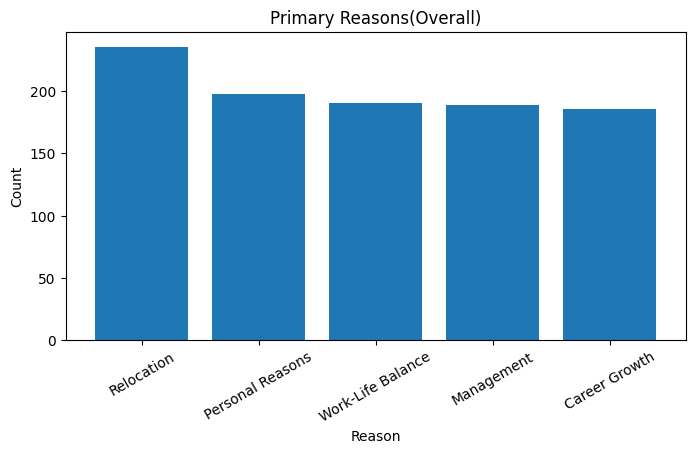

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting the data
All.transpose().plot(kind="bar", ax=ax, width=0.8)
ax.set_xlabel("Reason")
ax.set_ylabel("Count")
ax.set_title("Primary Reasons(Overall)")
plt.xticks(rotation=30)

In [14]:
pandas_df.department.unique()

<ArrowStringArray>
['Marketing', 'Sales', 'IT', 'HR', 'Finance']
Length: 5, dtype: string

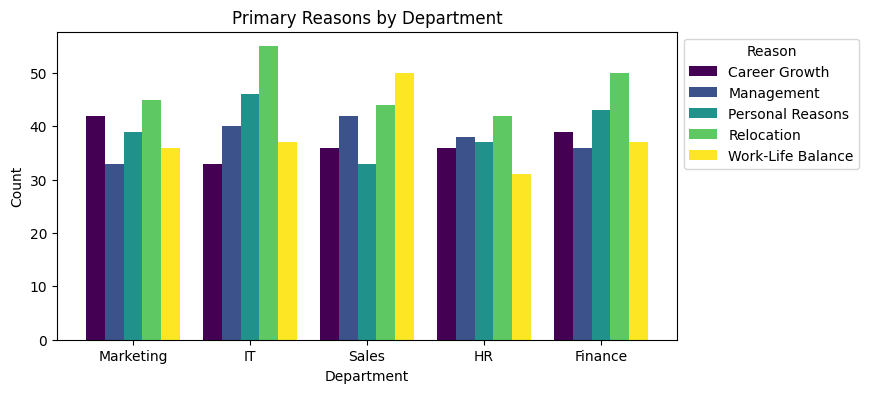

In [15]:
data = pd.DataFrame(
    {
        "Marketing": Marketing,
        "IT": IT,
        "Sales": Sales,
        "HR": HR,
        "Finance": Finance,
    }
)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting the data
data.transpose().plot(kind="bar", ax=ax, width=0.8, cmap="viridis")

# Set labels and title
ax.set_xlabel("Department")
ax.set_ylabel("Count")
ax.set_title("Primary Reasons by Department")

# Add legend
ax.legend(title="Reason", bbox_to_anchor=(1, 1))
ax.set_xticklabels(data, rotation=360)

# Show the plot
plt.show()

<!-- @format -->

<h3>What are the average years of service for employees leaving the company?</h3>


In [16]:
All = stats.mean(pandas_df["yr_of_service"])
Marketing = stats.mean(Fltr_Marketing["yr_of_service"])  # type: ignore
Sales = stats.mean(Fltr_Sales["yr_of_service"])  # type: ignore
IT = stats.mean(Fltr_IT["yr_of_service"])  # type: ignore
HR = stats.mean(Fltr_HR["yr_of_service"])  # type: ignore
Finance = stats.mean(Fltr_Finance["yr_of_service"])  # type: ignore

print(
    f"""Average Years of Service :

    All : {All}
    Marketing : {Marketing}
    Sales : {Sales}
    IT : {IT}
    HR : {HR}
    Finance : {Finance}"""
)

Average Years of Service :

    All : 5.582
    Marketing : 5.856410256410256
    Sales : 5.336585365853659
    IT : 5.649289099526066
    HR : 5.489130434782608
    Finance : 5.580487804878048


<!-- @format -->

<h3>How many employees have left from each department?</h3>


In [17]:
All = len(pandas_df["emp_id"])
Marketing = len(Fltr_Marketing["emp_id"])  # type: ignore
Sales = len(Fltr_Sales["emp_id"])  # type: ignore
IT = len(Fltr_IT["emp_id"])  # type: ignore
HR = len(Fltr_HR["emp_id"])  # type: ignore
Finance = len(Fltr_Finance["emp_id"])  # type: ignore
print(
    f"""Employees Left :

    All : {All}
    Marketing : {Marketing}
    Sales : {Sales}
    IT : {IT}
    HR : {HR}
    Finance : {Finance}"""
)

Employees Left :

    All : 1000
    Marketing : 195
    Sales : 205
    IT : 211
    HR : 184
    Finance : 205


In [18]:
def pieValues(pct, allvalues):
    allvalues_float = [float(value) for value in allvalues]
    absolute = round(pct / 100 * np.sum(allvalues_float))
    return "{:}".format(absolute)

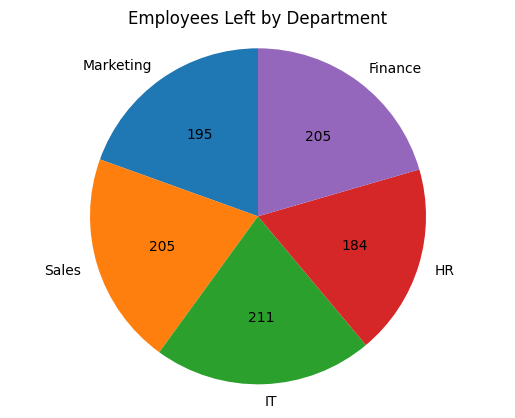

In [19]:
import matplotlib.pyplot as plt


labels = ["Marketing", "Sales", "IT", "HR", "Finance"]
sizes = [Marketing, Sales, IT, HR, Finance]


plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: (pieValues(pct, sizes)),
    startangle=90,
)

plt.axis("equal")

plt.title("Employees Left by Department")

plt.show()

<!-- @format -->

<h3>What is the distribution of overall satisfaction ratings?</h3>


In [20]:
All = pandas_df["Overall_Satisfaction"].value_counts().sort_index()
Marketing = Fltr_Marketing["Overall_Satisfaction"].value_counts().compute().sort_index()  # type: ignore
Sales = Fltr_Sales["Overall_Satisfaction"].value_counts().compute().sort_index()  # type: ignore
IT = Fltr_IT["Overall_Satisfaction"].value_counts().compute().sort_index()  # type: ignore
HR = Fltr_HR["Overall_Satisfaction"].value_counts().compute().sort_index()  # type: ignore
Finance = Fltr_Finance["Overall_Satisfaction"].value_counts().compute().sort_index()  # type: ignore
print(
    f"""Overall Satisfaction Distribution of rating (1-5):

    All : {All}

    Marketing : {Marketing}

    Sales : {Sales}

    IT : {IT}

    HR : {HR}

    Finance : {Finance}"""
)

Overall Satisfaction Distribution of rating (1-5):

    All : Overall_Satisfaction
1    196
2    194
3    205
4    205
5    200
Name: count, dtype: int64

    Marketing : Overall_Satisfaction
1    31
2    41
3    49
4    44
5    30
Name: count, dtype: int64

    Sales : Overall_Satisfaction
1    34
2    39
3    46
4    38
5    48
Name: count, dtype: int64

    IT : Overall_Satisfaction
1    48
2    39
3    42
4    43
5    39
Name: count, dtype: int64

    HR : Overall_Satisfaction
1    42
2    37
3    26
4    37
5    42
Name: count, dtype: int64

    Finance : Overall_Satisfaction
1    41
2    38
3    42
4    43
5    41
Name: count, dtype: int64


<!-- @format -->

<h1><b>Predictive Analysis</b></h1>


<!-- @format -->

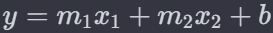

<h4 style="background-color:DodgerBlue;">y = Dependent variable(To be predicted)<br>
x = Independent variables(Basis for prediction)<br>
m = coefficients<br>
b = y-intercept or slope</h4>


<!-- @format -->

<h3>Can we predict an employee's Overall Satisfaction based on their Work Environment Rating and Opportunities for Growth?</h3>


In [21]:
x = pandas_df[["growth_oppur_num"]]
y = pandas_df["Overall_Satisfaction"]
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [22]:
x = pandas_df[["Work_Environment_Rating", "growth_oppur_num"]]
y = pandas_df["Overall_Satisfaction"]
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [23]:
growth_oppur_mapping

{'None': 0, 'Limited': 1, 'Adequate': 2, 'Excellent': 3}

In [24]:
x1 = 5
x2 = 3  # Adequate
m = model.coef_
b = model.intercept_

print(
    f"""x1 = {x1}
x2 = {x2} (Adequate)"""
)
print(
    f"""m1 = {m[0]}
m2 = {m[1]}"""
)
print(f"b = {b}")

x1 = 5
x2 = 3 (Adequate)
m1 = -0.011955310383355228
m2 = 0.008125386921340953
b = 3.0422347844108426


In [25]:
y = model.predict(
    pd.DataFrame({"Work_Environment_Rating": [x1], "growth_oppur_num": [x2]})
)
print(f"y = {y[0]}")

y = 3.006834393258089


In [26]:
x1_lst = sorted(pandas_df.Work_Environment_Rating.unique().tolist())
x2_lst = sorted(pandas_df.growth_oppur_num.unique().tolist())

In [27]:
for i in x1_lst:
    for j in x2_lst:
        y = model.predict(
            pd.DataFrame({"Work_Environment_Rating": [i], "growth_oppur_num": [j]})
        )
        if y >= 3:
            print(
                f"""
              "Work_Environment_Rating": {i}, "growth_oppur_num": {j}
              Overall_Satisfaction = {y[0]}"""
            )


              "Work_Environment_Rating": 1, "growth_oppur_num": 0
              Overall_Satisfaction = 3.030279474027487

              "Work_Environment_Rating": 1, "growth_oppur_num": 1
              Overall_Satisfaction = 3.038404860948828

              "Work_Environment_Rating": 1, "growth_oppur_num": 2
              Overall_Satisfaction = 3.0465302478701695

              "Work_Environment_Rating": 1, "growth_oppur_num": 3
              Overall_Satisfaction = 3.0546556347915104

              "Work_Environment_Rating": 2, "growth_oppur_num": 0
              Overall_Satisfaction = 3.0183241636441323

              "Work_Environment_Rating": 2, "growth_oppur_num": 1
              Overall_Satisfaction = 3.026449550565473

              "Work_Environment_Rating": 2, "growth_oppur_num": 2
              Overall_Satisfaction = 3.034574937486814

              "Work_Environment_Rating": 2, "growth_oppur_num": 3
              Overall_Satisfaction = 3.042700324408155

              "Work_

In [28]:
growth_oppur_mapping = {
    "None": 0,
    "Limited": 1,
    "Adequate": 2,
    "Excellent": 3,
}

key = list(filter(lambda x: growth_oppur_mapping[x] == 1, growth_oppur_mapping))[0]
key

'Limited'

<!-- @format -->

<h3>Is it possible to predict if an employee would recommend the company using their Salary Satisfaction and Management Satisfaction scores?</h3>


In [29]:
x = pandas_df[["Salary_Satisfaction", "Management_Satisfaction"]]
y = pandas_df["recommend_company"]
model = linear_model.LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [30]:
model.coef_[0]

array([0.00700074, 0.04994191])

In [31]:
x1 = 5
x2 = 1
m = model.coef_
b = model.intercept_

print(
    f"""x1 = {x1}
x2 = {x2}"""
)
print(
    f"""m1 = {m[0][0]}
m2 = {m[0][1]}"""
)
print(f"b = {b[0]}")

x1 = 5
x2 = 1
m1 = 0.007000738062699859
m2 = 0.049941913533449296
b = -0.10428601895193905


In [32]:
x1_lst = sorted(pandas_df.Salary_Satisfaction.unique().tolist())
x2_lst = sorted(pandas_df.Management_Satisfaction.unique().tolist())

In [33]:
for i in x1_lst:
    for j in x2_lst:
        y = model.predict(
            pd.DataFrame({"Salary_Satisfaction": [i], "Management_Satisfaction": [j]})
        )
        if y == "Yes":
            print(
                f"""
              "Salary_Satisfaction": {i}, "Management_Satisfaction": {j}
              Would Recommend = {y[0]}"""
            )


              "Salary_Satisfaction": 1, "Management_Satisfaction": 2
              Would Recommend = Yes

              "Salary_Satisfaction": 1, "Management_Satisfaction": 3
              Would Recommend = Yes

              "Salary_Satisfaction": 1, "Management_Satisfaction": 4
              Would Recommend = Yes

              "Salary_Satisfaction": 1, "Management_Satisfaction": 5
              Would Recommend = Yes

              "Salary_Satisfaction": 2, "Management_Satisfaction": 2
              Would Recommend = Yes

              "Salary_Satisfaction": 2, "Management_Satisfaction": 3
              Would Recommend = Yes

              "Salary_Satisfaction": 2, "Management_Satisfaction": 4
              Would Recommend = Yes

              "Salary_Satisfaction": 2, "Management_Satisfaction": 5
              Would Recommend = Yes

              "Salary_Satisfaction": 3, "Management_Satisfaction": 2
              Would Recommend = Yes

              "Salary_Satisfaction": 3, "Mana

<!-- @format -->

<h3>Are there specific factors that strongly influence an employee's likelihood to recommend the company?</h3>


In [34]:
X = pandas_df[
    [
        "Overall_Satisfaction",
        "Salary_Satisfaction",
        "Management_Satisfaction",
        "Work_Environment_Rating",
        "growth_oppur_num",
    ]
]
y = (pandas_df["recommend_company"] == "Yes").astype(int)
model = RandomForestClassifier(random_state=50)
model.fit(X, y)

RandomForestClassifier(random_state=50)

In [35]:
feature_importances = pd.Series(model.feature_importances_ * 100, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Feature Importances:
Salary_Satisfaction        22.018715
Work_Environment_Rating    20.903250
Overall_Satisfaction       20.618757
Management_Satisfaction    18.809082
growth_oppur_num           17.650196
dtype: float64


<!-- @format -->

<h1><b>Correlational Analysis</b></h1>


In [36]:
pandas_df

,emp_id,emp_name,department,yr_of_service,reason,Overall_Satisfaction,recommend_company,Work_Environment_Rating,Salary_Satisfaction,Management_Satisfaction,growth_oppur,growth_oppur_num,recommend_num
0,1,Employee 1,Marketing,10,Management,5,No,4,5,4,Limited,1,0
1,2,Employee 10,Sales,5,Career Growth,1,Yes,1,2,3,Adequate,2,1
2,3,Employee 100,IT,2,Personal Reasons,3,Yes,3,3,2,Excellent,3,1
3,4,Employee 1000,HR,8,Management,1,No,5,2,1,Limited,1,0
4,5,Employee 101,Finance,1,Relocation,1,No,3,2,3,Excellent,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Employee 995,Marketing,3,Work-Life Balance,2,Yes,4,3,1,Excellent,3,1
996,997,Employee 996,Marketing,5,Personal Reasons,4,No,3,4,2,None,0,0
997,998,Employee 997,Finance,3,Relocation,3,Yes,1,5,4,Limited,1,1
998,999,Employee 998,Marketing,9,Work-Life Balance,2,Yes,5,1,4,Adequate,2,1


<!-- @format -->

<h3>Is there a correlation between overall satisfaction and other factors like work environment, salary, management, or growth opportunities?</h3>


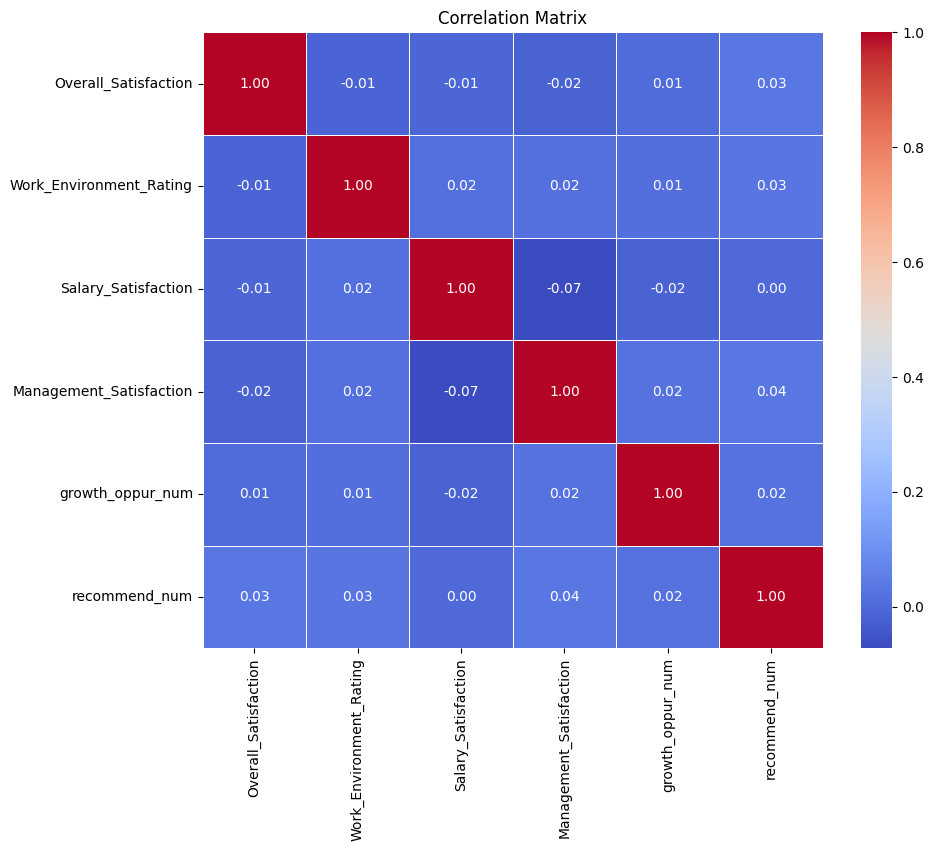

In [37]:
correlation_matrix = pandas_df[
    [
        "Overall_Satisfaction",
        "Work_Environment_Rating",
        "Salary_Satisfaction",
        "Management_Satisfaction",
        "growth_oppur_num",
        "recommend_num",
    ]
].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<!-- @format -->

<h1><b>KPIs</b></h1>


<!-- @format -->

<h2>Formula for index :
<br>
(Count_of_highest_ratings/Total counts)*100 </h2>


In [38]:
total = len(pandas_df.emp_id)
total

1000

In [39]:
def RateCalc(a):
    val = (a / total) * 100
    return val

<!-- @format -->

<h3>Overall Satisfaction Rate</h3>


In [40]:
highCounts = (
    pandas_df["Overall_Satisfaction"].isin([3, 4, 5]).value_counts().tolist()[0]
)
Overall_Satisfaction_Rate = RateCalc(highCounts)
Overall_Satisfaction_Rate

61.0

<!-- @format -->

<h3>Work Environment Satisfaction Rate</h3>


In [41]:
highCounts = (
    pandas_df["Work_Environment_Rating"].isin([3, 4, 5]).value_counts().tolist()[0]
)
Work_Environment_Rate = RateCalc(highCounts)
Work_Environment_Rate

59.8

<!-- @format -->

<h3>Salary Satisfaction Rate</h3>


In [42]:
highCounts = pandas_df["Salary_Satisfaction"].isin([3, 4, 5]).value_counts().tolist()[0]
Salary_Satisfaction_Rate = RateCalc(highCounts)
Salary_Satisfaction_Rate

59.0

<!-- @format -->

<h3>Management Satisfaction Rate</h3>


In [43]:
highCounts = (
    pandas_df["Management_Satisfaction"].isin([3, 4, 5]).value_counts().tolist()[0]
)
Management_Satisfaction_Rate = RateCalc(highCounts)
Management_Satisfaction_Rate

61.9

<!-- @format -->

<h3>Employee Recommendation Rate</h3>


In [44]:
highCounts = pandas_df["recommend_company"].eq("Yes").sum()
recommend_company_Rate = RateCalc(highCounts)
recommend_company_Rate

51.7

<!-- @format -->

<h1><b>Sentimental Analysis</b></h1>


In [45]:
import nltk  # type: ignore
from nltk.sentiment import SentimentIntensityAnalyzer  # type: ignore

# Assuming pandas_df is your DataFrame with relevant columns
sia = SentimentIntensityAnalyzer()

# Example: Analyzing sentiment for the "Management_Satisfaction" column
pandas_df["Management_Sentiment"] = pandas_df["Management_Satisfaction"].apply(
    lambda x: sia.polarity_scores(str(x))["compound"]
)

# Repeat similar steps for other columns like "Work_Environment_Satisfaction" and "Growth_Opportunity_Satisfaction"

# Display the DataFrame with sentiment scores
a = pandas_df[["Management_Satisfaction", "Management_Sentiment"]]
a

,Management_Satisfaction,Management_Sentiment
0,4,0.0
1,3,0.0
2,2,0.0
3,1,0.0
4,3,0.0
...,...,...
995,1,0.0
996,2,0.0
997,4,0.0
998,4,0.0


In [46]:
# Assuming pandas_df is your DataFrame with relevant columns
sia = SentimentIntensityAnalyzer()

# Analyzing sentiment for "Reason for Leaving" column
pandas_df["Reason_Sentiment"] = pandas_df["reason"].apply(
    lambda x: sia.polarity_scores(str(x))["compound"]
)

# Analyzing sentiment for "Would Recommend Company" column
pandas_df["Recommendation_Sentiment"] = pandas_df["recommend_company"].apply(
    lambda x: sia.polarity_scores(str(x))["compound"]
)

b = pandas_df[
    [
        "reason",
        "Reason_Sentiment",
        "recommend_company",
        "Recommendation_Sentiment",
    ]
]
b

,reason,Reason_Sentiment,recommend_company,Recommendation_Sentiment
0,Management,0.0000,No,-0.2960
1,Career Growth,0.3818,Yes,0.4019
2,Personal Reasons,0.0000,Yes,0.4019
3,Management,0.0000,No,-0.2960
4,Relocation,0.0000,No,-0.2960
...,...,...,...,...
995,Work-Life Balance,0.0000,Yes,0.4019
996,Personal Reasons,0.0000,No,-0.2960
997,Relocation,0.0000,Yes,0.4019
998,Work-Life Balance,0.0000,Yes,0.4019
